##### Numpy array vs Python lists

In [39]:
# speed
# list 
a = [i for i in range(10000000)]
b = [i for i in range(1000000,20000000)]
c = []
import time 

start = time.time()
for i in range(len(a)):
    c.append(a[i]+ b[i])

print(time.time()- start)

0.8663861751556396


In [40]:
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)
import time 
start = time.time()
c = a+b
print(time.time()-start)


0.06431078910827637


In [41]:
# memory
a = [ i for i in range (100)]
import sys
sys.getsizeof(a)

904

In [42]:
a = np.arange(100,dtype = np.int32)
sys.getsizeof(a)

512

#### Advance Indexing 


In [43]:
# Normal Indexing and Slicing 
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [44]:
a[1,2]

6

In [45]:
a[1:4,1:4]

array([[ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [46]:
# Fancy Indexing 
a
a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [47]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [48]:
# Boolean Indexing
import numpy as np
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[69, 41, 76, 50],
       [16, 68, 33, 15],
       [41, 61,  4, 97],
       [97, 62, 79, 95],
       [64, 56, 46, 38],
       [35, 27, 16, 58]])

In [49]:
import numpy as np 
a = np.random.randint(1,100,24).reshape(6,4)
print(a)

[[90  4 34 16]
 [20 96 40 80]
 [77 53 77 69]
 [68 63 93 57]
 [39  9 87 72]
 [65 61 90 45]]


In [50]:
# find all the numbers greater than 50 
a > 50 

array([[ True, False, False, False],
       [False,  True, False,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True,  True, False]])

In [51]:
# find out even numbers 
a %2 == 0 


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [False, False, False, False],
       [ True, False, False, False],
       [False, False, False,  True],
       [False, False,  True, False]])

In [52]:
a[(a %2 == 0 ) & (a>50)]

array([90, 96, 80, 68, 72, 90])

In [53]:
# find all the numbers not divisble by 7
a[~(a%7 == 0 )]

array([90,  4, 34, 16, 20, 96, 40, 80, 53, 69, 68, 93, 57, 39,  9, 87, 72,
       65, 61, 90, 45])

#### Broadcasting
The term broadcasting describes how NumPy treats  arrays with different shapes during arithmetic operations.<br>
The samaller array is "brodcast" across the larger array so that they have comapatible shapes.

In [54]:
# same shape 
import numpy as np
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
print(a)
print(b)
print("****************")
print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
****************
[[ 6  8 10]
 [12 14 16]]


In [55]:
# same shape 
import numpy as np
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)
print(a)
print(b)
print("****************")
print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
****************
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules 
1. Make the two arrays have the same number of dimensions.
+ If the number of dimension of the two arrays are different , add new dimensions with size 1 to the head of the array with the smaller dimension.


2.Make each dimension of the two arrays the same size.
+ If the size of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
+ If there is a dimesion whoser size is not 1 in either of the two arrays , it cannot be broadcast, and an error is raised.

In [56]:
# examples 
a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a) 
print(b) 
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [57]:
# examples 
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a) 
print(b) 
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)
print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)
print(a+b)


[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [ ]:
a = np.array([1])
b = np.arange(4).reshape(2,2)
print(a+b)

[[1 2]
 [3 4]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)
print(a+b)

ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [ ]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)
print(a)
print(b)
print(a+b)

NameError: name 'np' is not defined

### Working with Mathematical formulas.

In [ ]:
import numpy as np 
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [ ]:
# sigmoid 
def sigmoid(array):
    return 1/(1+np.exp(-(array)))



a = np.arange(100)
sigmoid(a)




array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
# mean squared error
actual = np.random.randint(1,50,25)
predict = np.random.randint(1,50,25)

In [ ]:
def mse(actual , predict):
    return np.mean (actual - predict)**2

In [ ]:
actual

array([30, 16,  7,  6, 29,  3, 43, 22, 46, 18,  1, 12,  1,  8, 15,  3, 34,
        2, 44, 47, 35, 39, 24,  1, 33])

In [ ]:
predict

array([ 4, 44, 41, 44, 12, 45, 48, 44, 27, 32, 11, 43, 18, 26, 26, 10, 46,
       30, 16, 49, 16,  9, 15,  5, 26])

In [ ]:
mse(actual,predict)

45.15839999999999

In [ ]:
# categorial cross entropy.
# not now to study


#### working with missing values


In [ ]:
# working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [ ]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

### Plotting a Graphs


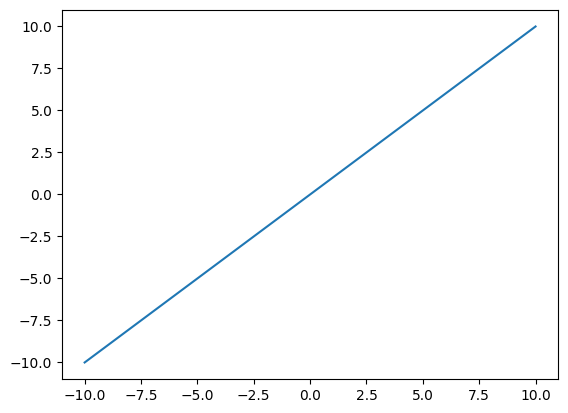

In [ ]:
# Plotting a  2D graph
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x
plt.plot(x,y)


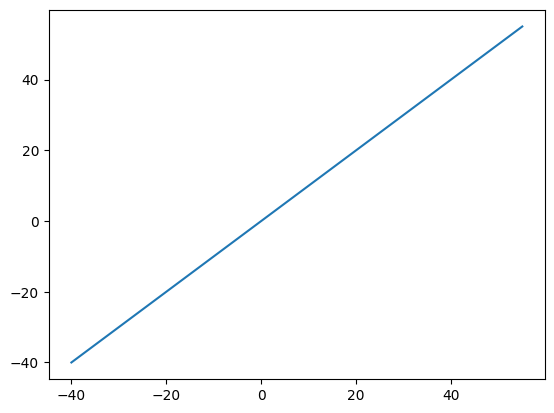

In [ ]:
a = np.linspace(-40,55,1000)
b = np.linspace(-40,55,1000)

plt.plot(a,b)

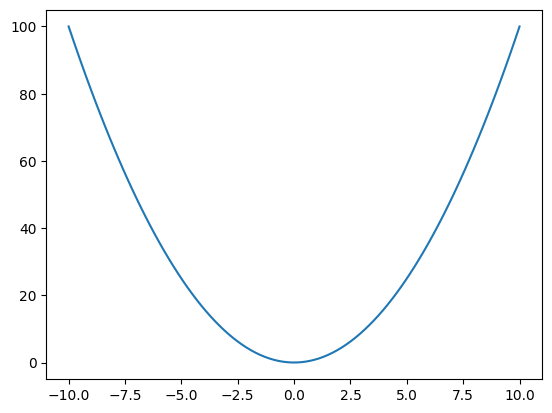

In [ ]:
# y = x**2
x = np.linspace(-10,10, 100)
y = x**2
plt.plot(x,y)

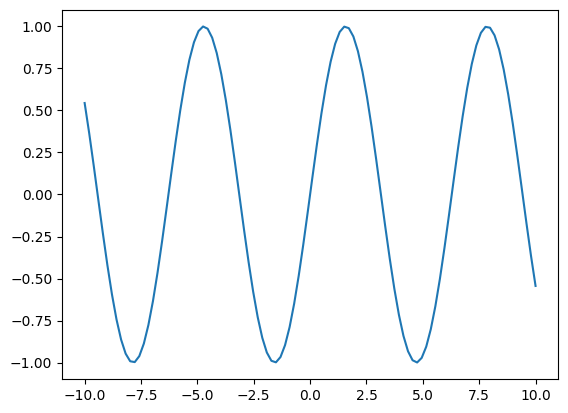

In [ ]:
# y = sin(x)
x = np.linspace(-10,10, 100)
y = np.sin(x)
plt.plot(x,y)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_30552\4141531492.py:3: RuntimeWarning: invalid value encountered in log
  y = x*np.log(x)


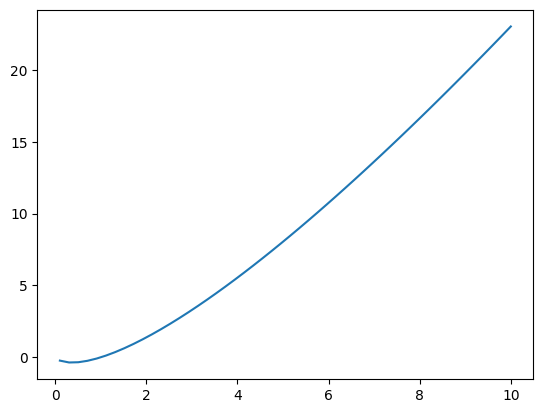

In [ ]:
# y = xlog(x)
x  = np.linspace(-10,10,100)
y = x*np.log(x)
plt.plot(x,y)

In [10]:
list1 = [1,2,3,45,5]

for i in list1[::-1]:
    print(i)

5
45
3
2
1


In [15]:
# function to print array
def printArray(arr, n):
    print("The reversed array is:- ")
    for i in range(n):
        print(arr[i], end=" ")
    print()


def reverseArray(arr, n):
    ans = [0] * n
    for i in range(n - 1,-1, -1):
        ans[n - i - 1] = arr[i]
    printArray(ans, n)


# Driver Code
if __name__ == "__main__":
    arr = [5, 4, 3, 2, 1]
    n = len(arr)
    reverseArray(arr, n)

The reversed array is:- 
1 2 3 4 5 


In [3]:
def f(i,string):
    if i>=len(string)/2:
        return True
    if string[i] != string[len(string)-i-1]:
        return False
    return f(i+1,string)

string = input()
print(f(0,string))

True
